# 1_WeatherPy
---


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 579


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"] - 273.15
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | leer
Processing Record 2 of Set 1 | isabela
Processing Record 3 of Set 1 | kununurra
Processing Record 4 of Set 1 | nosivka
Processing Record 5 of Set 1 | hawaiian paradise park
Processing Record 6 of Set 1 | penn yan
Processing Record 7 of Set 1 | wailua homesteads
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | weno
Processing Record 11 of Set 1 | borisovka
Processing Record 12 of Set 1 | north bay
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | tadine
Processing Record 16 of Set 1 | la passe
Processing Record 17 of Set 1 | klyuchi
Processing Record 18 of Set 1 | alo
Processing Record 19 of Set 1 | dubbo
Processing Record 20 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 21 of Set 1 | port lincoln
Processing Record 22 of Set 1 | greymouth

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,leer,53.2316,7.4610,14.41,94,13,3.14,DE,1690255348
1,isabela,6.7085,121.9711,30.03,69,83,6.06,PH,1690255348
2,kununurra,-15.7667,128.7333,20.99,24,10,7.20,AU,1690255349
3,nosivka,50.9315,31.5828,17.75,63,87,4.18,UA,1690255349
4,hawaiian paradise park,19.5933,-154.9731,26.73,89,100,3.09,US,1690255349


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,leer,53.2316,7.4610,14.41,94,13,3.14,DE,1690255348
1,isabela,6.7085,121.9711,30.03,69,83,6.06,PH,1690255348
2,kununurra,-15.7667,128.7333,20.99,24,10,7.20,AU,1690255349
3,nosivka,50.9315,31.5828,17.75,63,87,4.18,UA,1690255349
4,hawaiian paradise park,19.5933,-154.9731,26.73,89,100,3.09,US,1690255349


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

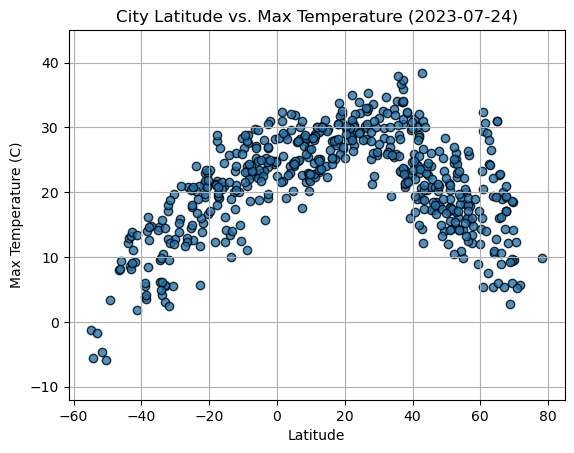

In [35]:
# Compute and store today's date for graphs
timestamp = city_data_df["Date"].mean()
date = time.strftime('%Y-%m-%d', time.localtime(timestamp))

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.ylim(-12,45)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

# To close pyplot
plt.close()

#### Latitude Vs. Humidity

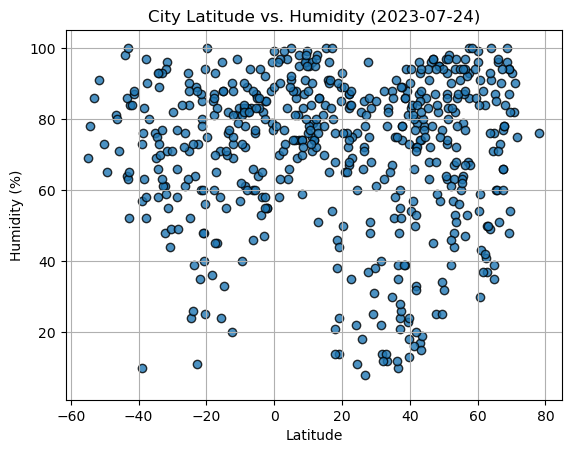

In [36]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(1, 105)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

# To close pyplot
plt.close()

#### Latitude Vs. Cloudiness

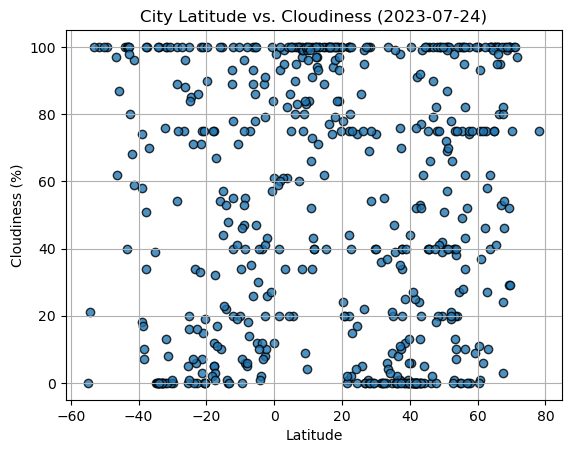

In [37]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5, 105)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

# To close pyplot
plt.close()

#### Latitude vs. Wind Speed Plot

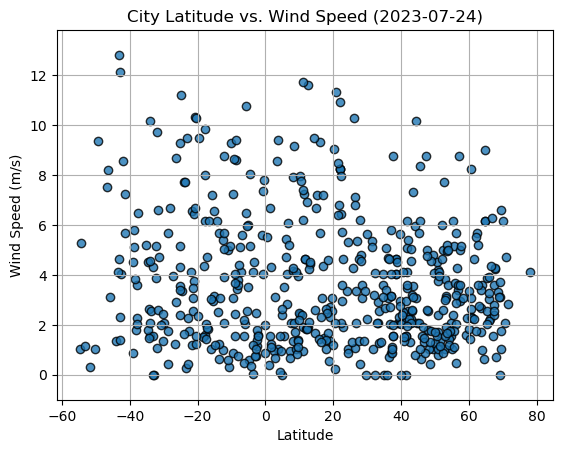

In [38]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (" + date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.ylim(-1, 13.8)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

# To close pyplot
plt.close()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots

def plot_linear_reg(x_values,y_values,y_label,x_annot,y_annot,y_min,y_max):
    plt.scatter(x_values, y_values, edgecolor="Blue", alpha=1)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.ylim(y_min,y_max)
    plt.grid(False)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    r_values= x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,r_values,"r-")
    plt.annotate(line_eq,(x_annot,y_annot),fontsize=15,color="red")
    print("The r-value is: "+ str(rvalue))
    print(" ")
    plt.show()
    plt.close()
    

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df[city_data_df["Lat"] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,leer,53.2316,7.4610,14.41,94,13,3.14,DE,1690255348
1,isabela,6.7085,121.9711,30.03,69,83,6.06,PH,1690255348
3,nosivka,50.9315,31.5828,17.75,63,87,4.18,UA,1690255349
4,hawaiian paradise park,19.5933,-154.9731,26.73,89,100,3.09,US,1690255349
5,penn yan,42.6609,-77.0539,18.95,96,0,2.06,US,1690255349


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,kununurra,-15.7667,128.7333,20.99,24,10,7.20,AU,1690255349
7,waitangi,-43.9535,-176.5597,12.12,98,100,1.34,NZ,1690255350
8,grytviken,-54.2811,-36.5092,-5.59,78,21,5.27,GS,1690255350
13,adamstown,-25.0660,-130.1015,20.53,71,16,4.31,PN,1690255351
14,tadine,-21.5500,167.8833,21.20,60,100,6.57,NC,1690255351


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.5942079279844591
 


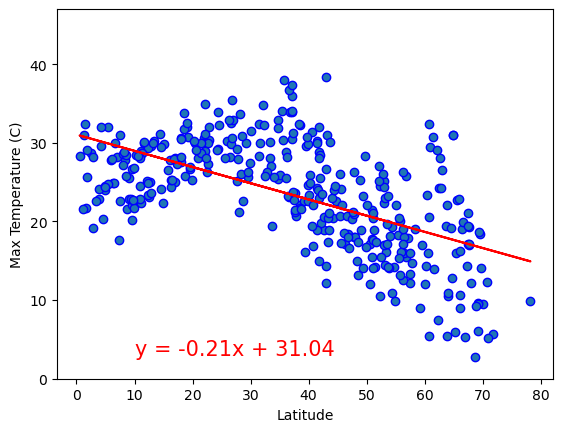

In [18]:
# Linear regression on Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Max Temp"]
y_label = "Max Temperature (C)"
x_annot = 10
y_annot = 3
y_min = 0
y_max = 47

plot_linear_reg(x_values,y_values,y_label,x_annot,y_annot,y_min,y_max)


The r-value is: 0.8123606775159574
 


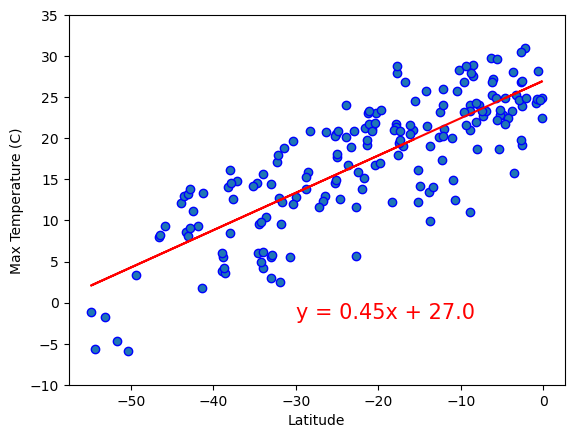

In [19]:
# Linear regression on Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Max Temp"]
y_label = "Max Temperature (C)"
x_annot = -30
y_annot = -2
y_min = -10
y_max = 35

plot_linear_reg(x_values,y_values,y_label,x_annot,y_annot,y_min,y_max)

**Discussion about the linear relationship:**

Based on the scatter plots, it can be concluded that as the latitude gets closer to zero, the maximum air temperature tends to increase, 
and as the latitude gets further away from zero, the maximum air temperature tends to decrease. 
As a result, it can be observed that at latitudes greater than 60 and less than -50, the max temperatures are closest to zero.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.05326626053676931
 


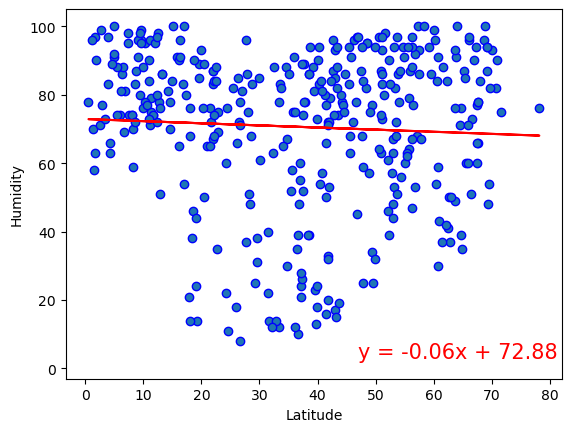

In [20]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Humidity"]
y_label = "Humidity"
x_annot = 47
y_annot = 3
y_min = -3
y_max = 105

plot_linear_reg(x_values,y_values,y_label,x_annot,y_annot,y_min,y_max)

The r-value is: 0.024948128532751163
 


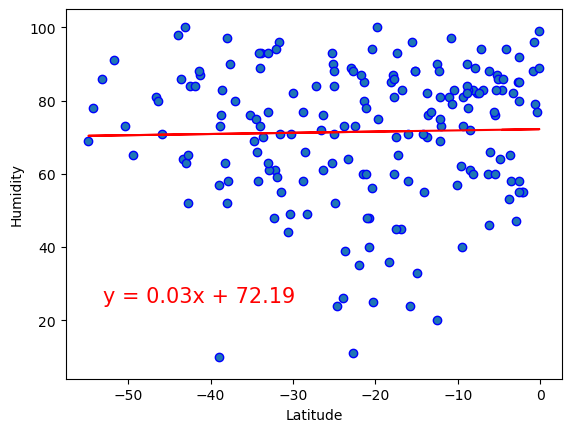

In [21]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Humidity"]
y_label = "Humidity"
x_annot = -53
y_annot = 25
y_min = 4
y_max = 105

plot_linear_reg(x_values,y_values,y_label,x_annot,y_annot,y_min,y_max)

**Discussion about the linear relationship:**

Based on the scatter plots, it can be concluded that measuring humidity levels based on latitude alone is not a suitable parameter for statistical analysis.
While latitude can be a contributing factor, other variables such as temperature also play a significant role in determining humidity levels.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.12969064249633555
 


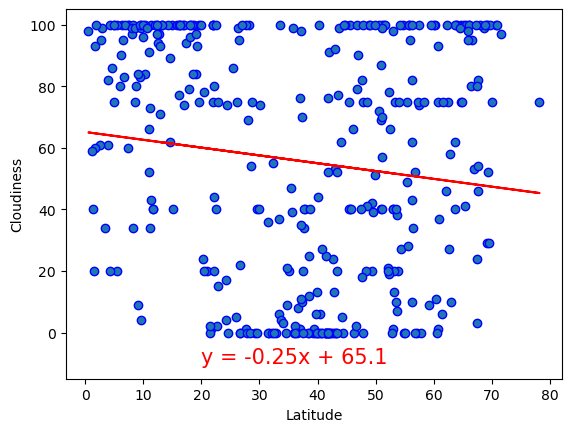

In [22]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Cloudiness"]
y_label = "Cloudiness"
x_annot = 20
y_annot = -10
y_min = -15
y_max = 105

plot_linear_reg(x_values,y_values,y_label,x_annot,y_annot,y_min,y_max)

The r-value is: -0.12460267675172532
 


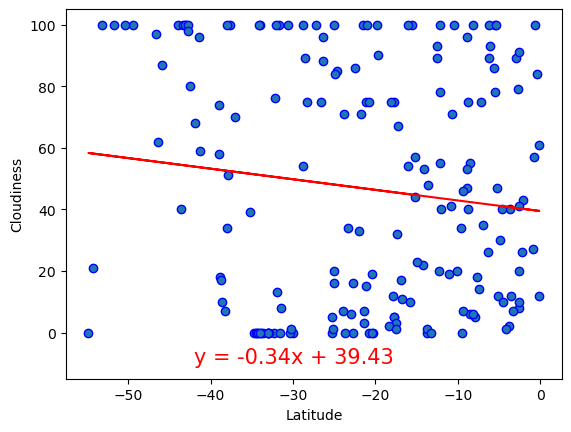

In [25]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Cloudiness"]
y_label = "Cloudiness"
x_annot = -42
y_annot = -10
y_min = -15
y_max = 105

plot_linear_reg(x_values,y_values,y_label,x_annot,y_annot,y_min,y_max)

**Discussion about the linear relationship:** 

Based on the scatter plots, we can see that there is a very slight trend for increased cloudiness as we move away from the equator towards the poles, in both the Northern and Southern Hemisphere. However, as with the relationship between humidity and latitude, the weak correlation between latitude and cloudiness indicates that other factors also play a significant role in determining cloudiness levels. The difference in correlation values between the hemispheres is relatively small, indicating that latitude affects cloudiness similarly in both hemispheres. To better understand the relationship between latitude and cloudiness, it's essential to consider multiple factors together.


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.09006671853356715
 


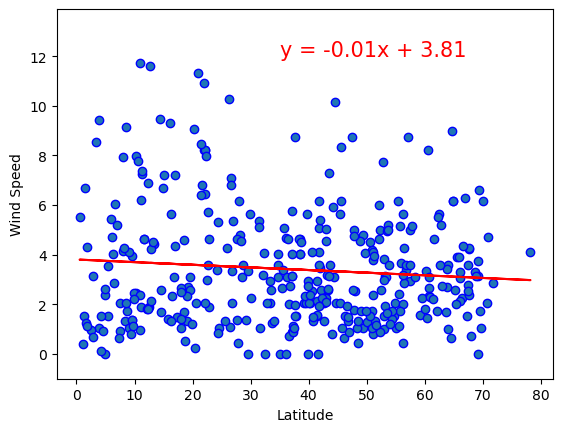

In [32]:
# Northern Hemisphere
x_values=northern_hemi_df["Lat"]
y_values=northern_hemi_df["Wind Speed"]
y_label = "Wind Speed"
x_annot = 35
y_annot = 12
y_min = -1
y_max = 13.9

plot_linear_reg(x_values,y_values,y_label,x_annot,y_annot,y_min,y_max)

The r-value is: -0.09876306386828142
 


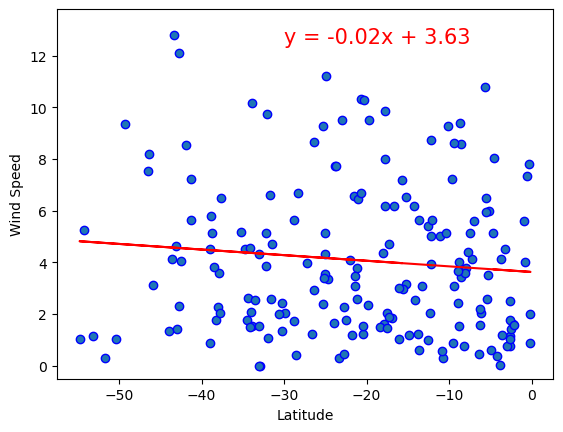

In [33]:
# Southern Hemisphere
x_values=southern_hemi_df["Lat"]
y_values=southern_hemi_df["Wind Speed"]
y_label = "Wind Speed"
x_annot = -30
y_annot = 12.5
y_min = -0.5
y_max = 13.8

plot_linear_reg(x_values,y_values,y_label,x_annot,y_annot,y_min,y_max)

**Discussion about the linear relationship:** 

Based on the scatter plots, we can observe a weak correlation between latitude and wind speed in both hemispheres. 
As with cloudiness and humidity, other contributing factors may play a more significant role in determining wind speed. 

To gain a better understanding of the relationship between latitude and wind speed, it is necessary to consider multiple factors together.